This example shows how to use `pymsis` to compute elemental abundances for McMurdo Station, Antarctica.
It contains some examples from the `pymsis` documentation to verify it's working.

In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

from pymsis import msis

from adetsim.atmoatt.atmospheric_lookup_table import compute_lookup_table, plot_abundances

# Using pre-made tools

This computes a lookup table containing atmospheric data for McMurdo Station, Antarctica and plots the abundances vs. altitude.

removed Anomalous Oden
removed NOden
  total mass density           N2den          ...    Temperature     altitude
       g / cm3                1 / cm3         ...         K             km   
---------------------- ---------------------- ... ------------------ --------
 0.0013359237927943468 2.1701593161042756e+19 ... 261.31146240234375      0.0
 0.0011882586404681206 1.9302828225142456e+19 ...  257.4674987792969      1.0
  0.001058763824403286 1.7199231583765135e+19 ...  252.6787872314453      2.0
 0.0009433234808966517 1.5323945233360617e+19 ... 247.32630920410156      3.0
 0.0008390956791117787 1.3630802879701844e+19 ...  241.7501678466797      4.0
 0.0007441750494763255 1.2088851071443665e+19 ... 236.24143981933594      5.0
 0.0006573235732503235 1.0677981939937313e+19 ...  231.0441131591797      6.0
 0.0005777693586423993  9.385653356044747e+18 ... 226.36390686035156      7.0
 0.0005050402251072228  8.204194576894788e+18 ... 222.37493896484375      8.0
                   ...     

<Axes: title={'center': 'Atmospheric Abundances on 2023-12-01T00:00, -77.84 deg, 166.67 deg'}, xlabel='Altitude (km)', ylabel='Abundance'>

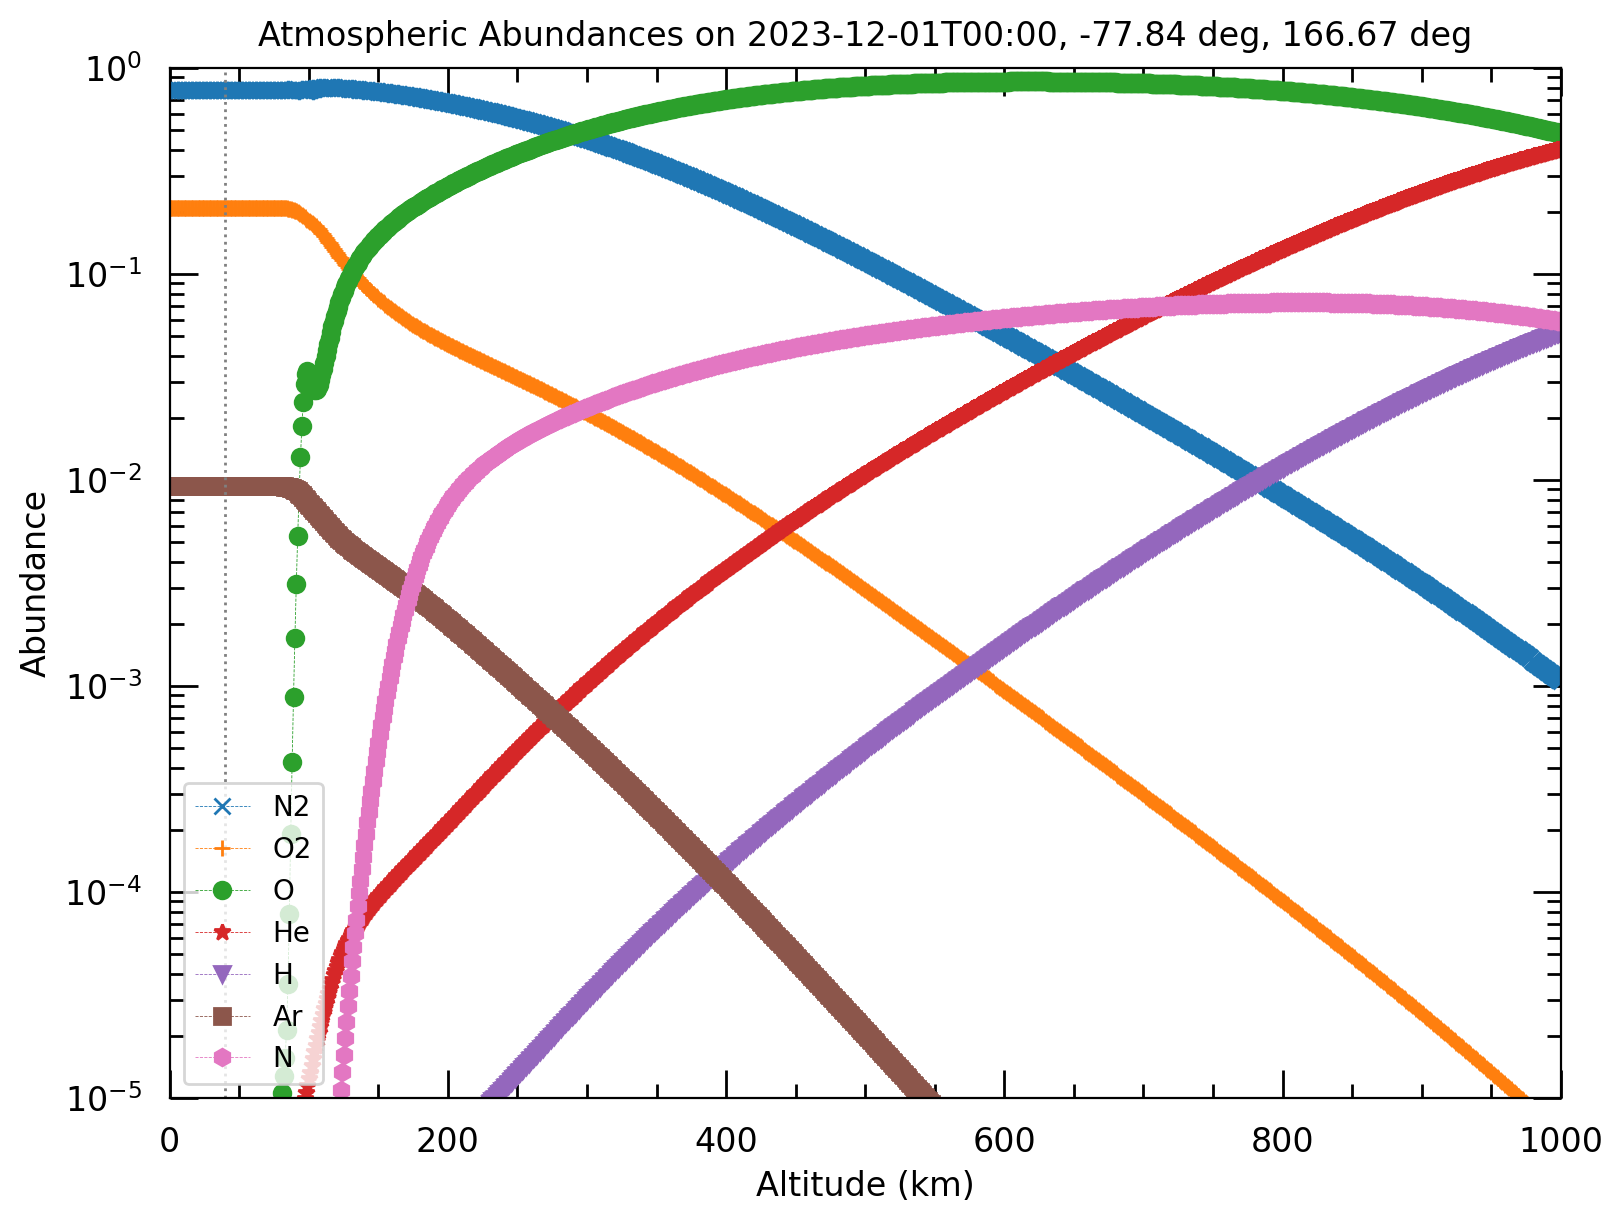

In [2]:
mcmurdo_table = compute_lookup_table(
    np.datetime64('2023-12-01T00:00'),
    -77.84 * u.degree,
    166.67 * u.degree,
    0 * u.km,
    1000 * u.km,
    1 * u.km
)
print(mcmurdo_table)
plot_abundances(mcmurdo_table)

# Adaptation of online example

Plots the difference between noon and midnight.
Uses parameters corresponding to McMurdo Station, Antarctica.

<class 'numpy.ndarray'> (1, 1, 1, 1001, 11)
[[[[[1.3370657e+00 2.1720146e+25 5.8244176e+24 ...           nan
               nan 2.6108850e+02]
    [1.2232264e+00 1.9870870e+25 5.3285202e+24 ...           nan
               nan 2.5853476e+02]
    [1.1210324e+00 1.8210761e+25 4.8833501e+24 ...           nan
               nan 2.5527701e+02]
    ...
    [6.7305394e-14 9.5049761e+10 1.4111666e+09 ... 6.6395034e+10
     1.1201308e+08 1.5138312e+03]
    [6.6793827e-14 9.3809304e+10 1.3901467e+09 ... 6.6223407e+10
     1.1044776e+08 1.5138320e+03]
    [6.6286352e-14 9.2584878e+10 1.3694423e+09 ... 6.6052223e+10
     1.0890411e+08 1.5138329e+03]]]]]


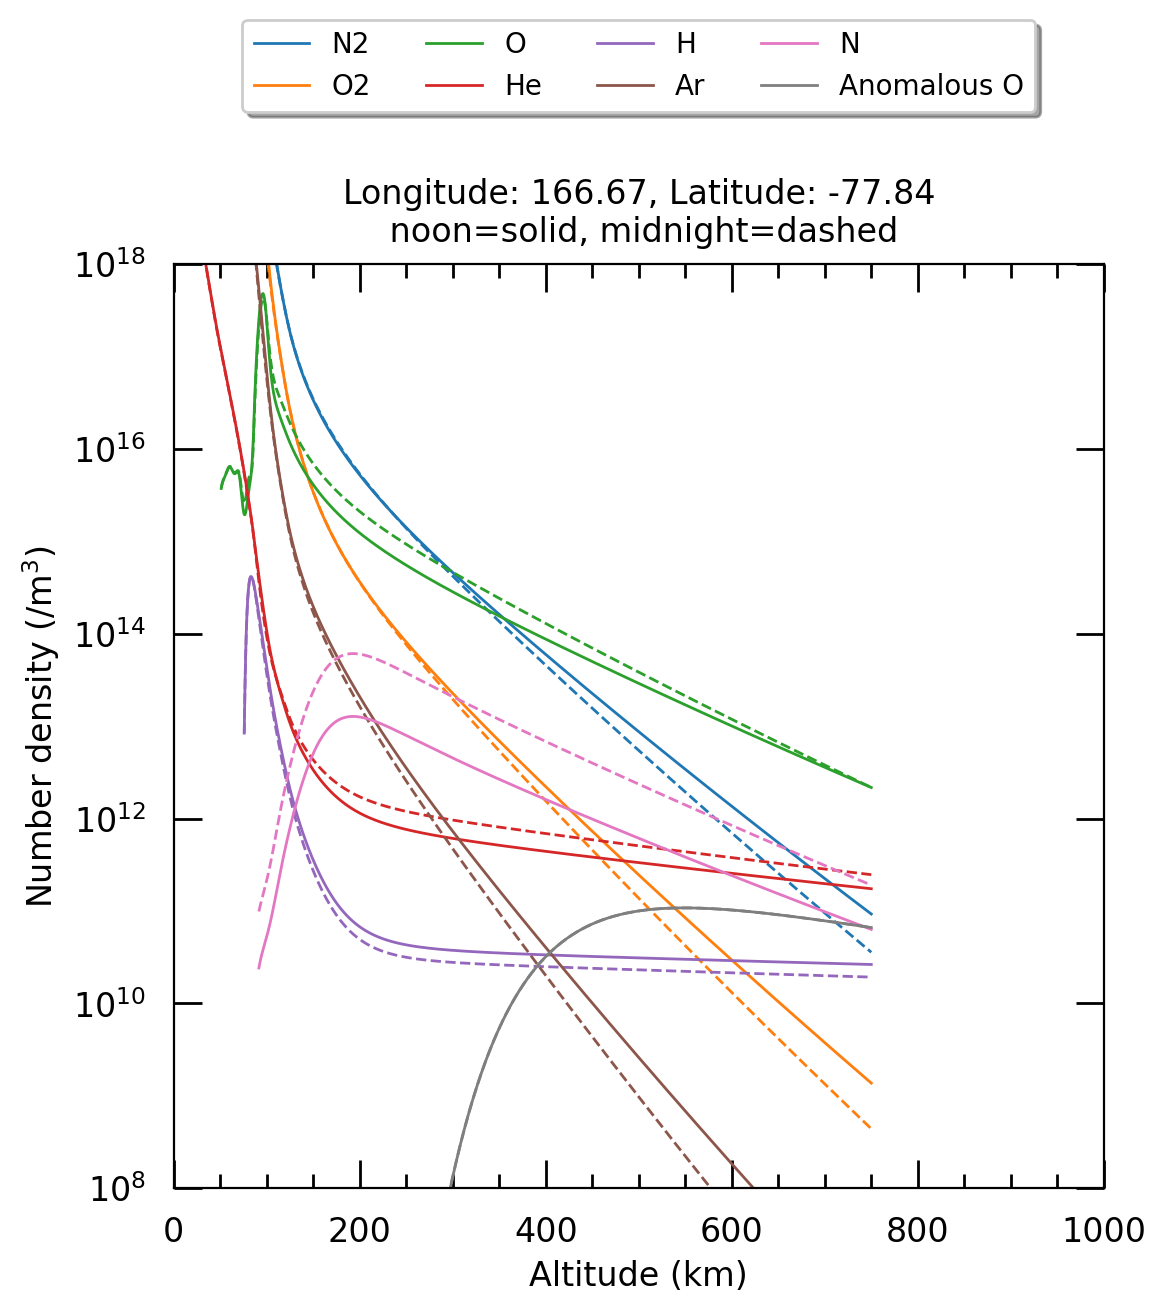

In [3]:
lon = 166.67
lat = -77.84
alts = np.linspace(0, 750, 1001)
# f107 = 150
# f107a = 150
ap = 7
aps = [[ap] * 7]

date = np.datetime64('2023-12-01T00:00')
output_midnight = msis.run(date, lon, lat, alts)
date = np.datetime64('2023-12-01T12:00')
output_noon = msis.run(date, lon, lat, alts)

print(output_noon.__class__, output_noon.shape)
print(output_noon)

#  output is now of the shape (1, 1, 1, 1000, 11)
# Get rid of the single dimensions
output_midnight = np.squeeze(output_midnight)
output_noon = np.squeeze(output_noon)

variables = [
    'Total mass density',
    'N2',
    'O2',
    'O',
    'He',
    'H',
    'Ar',
    'N',
    'Anomalous O',
    'NO',
    'Temperature',
]

_, ax = plt.subplots()
for i, label in enumerate(variables):
    if label in ('NO', 'Total mass density', 'Temperature'):
        # There is currently no NO data, also ignore non-number densities
        continue
    (line,) = ax.plot(alts, output_midnight[:, i], linestyle='--')
    ax.plot(alts, output_noon[:, i], c=line.get_color(), label=label)

ax.legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=4
)

ax.set_title(f'Longitude: {lon}, Latitude: {lat}\n noon=solid, midnight=dashed')
ax.set_yscale('log')
ax.set_ylim(1e8, 1e18)
ax.set_xlim(0, 1000)
ax.set_ylabel('Number density (/m$^3$)')
ax.set_xlabel('Altitude (km)')

plt.show()